In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

In [2]:
movies =pd.read_csv('ratings_small.csv')
movies.head(5)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [3]:
movies.head(5)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [6]:
movies.drop('timestamp' , axis=1 , inplace=True)
movies.columns

Index(['userId', 'movieId', 'rating'], dtype='object')

In [7]:
movies.shape

(100004, 3)

In [8]:
# check for missing values
movies.isna().sum()

userId     0
movieId    0
rating     0
dtype: int64

In [19]:
movies['userId'].nunique()

671

In [20]:
movies['movieId'].nunique()

9066

In [18]:
# which user has rated the most
movies['userId'].value_counts()

547    2391
564    1868
624    1735
15     1700
73     1610
       ... 
296      20
289      20
249      20
221      20
1        20
Name: userId, Length: 671, dtype: int64

In [29]:
mv=movies.groupby('userId').count()['movieId']
print(mv)

userId
1       20
2       76
3       51
4      204
5      100
      ... 
667     68
668     20
669     37
670     31
671    115
Name: movieId, Length: 671, dtype: int64


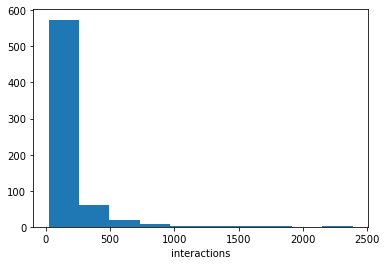

In [21]:
# create a histogram of all the interactions by all the users present in the dataset
interactions =movies.groupby('userId').count()['movieId']
plt.hist(interactions , bins=10)
plt.xlabel('interactions')
plt.show()

Creating user item interactions matrix

In [30]:
# create the user item matrix using the ratings dataset 
user_matrix=movies.pivot_table(index='userId', columns='movieId',values='rating')

In [31]:
user_matrix.shape

(671, 9066)

In [32]:
user_matrix.head(5)

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
user_matrix.fillna(0,inplace=True)
user_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
print([user_matrix.loc[5]])

[movieId
1         0.0
2         0.0
3         4.0
4         0.0
5         0.0
         ... 
161944    0.0
162376    0.0
162542    0.0
162672    0.0
163949    0.0
Name: 5, Length: 9066, dtype: float64]


### Task 4: Finding similar users

In [44]:
## finding similar users ##
from sklearn.metrics.pairwise import cosine_similarity

def similar_users(user_id, data):
    
    # compute similarity of each user to the provided user
    similarite=[]
    for user in range(1, data.shape[0]+1):
        sim=cosine_similarity([data.loc[user_id]],[data.loc[user]])
        similarite.append((user,sim))
        
    similarite.sort(key=lambda x: x[1] , reverse=True)
    user_ids=[tup[0] for tup in similarite] # create list of just the user ids
    score_sim=[tup[1] for tup in similarite]# create list of similarity score
    
    user_ids.remove(user_id)
    score_sim.remove(score_sim[0])
       
    return user_ids , score_sim

In [48]:
print(f"user similaire {similar_users(4,user_matrix)[0][:10]}")
print("")
print(f"score de similairite {similar_users(4,user_matrix)[1][:10]}")

user similaire [518, 130, 466, 285, 268, 232, 358, 214, 442, 137]

score de similairite [array([[0.39241337]]), array([[0.3907025]]), array([[0.37885571]]), array([[0.36076452]]), array([[0.35070341]]), array([[0.34864736]]), array([[0.34553478]]), array([[0.34284005]]), array([[0.33768935]]), array([[0.33575114]])]


### Task 5: Creating similarity based collaborative recommendation system

In [66]:
#recommandations
def recommendations(user_id, num_of_movies, user_item_interactions):
    
    most_similar_user=similar_users(user_id, user_item_interactions)[0]
    movies_vue =set(list(user_matrix.columns[np.where(user_matrix.loc[user_id] > 0)])) #movies which this user has already interacted with

    recomandation=[]
    
    movie_deja_vue=movies_vue.copy()
    
    for similar_user in most_similar_user :

            if len(recomandation) < num_of_movies:
            
            # store all the movies interacted by each similar user to user_id
                movies_vue_user_similaire=set(list(user_matrix.columns[np.where(user_matrix.loc[similar_user] > 0)]))
                
                recomandation.extend(movies_vue_user_similaire.difference(movie_deja_vue)
                movie_deja_vue=movie_deja_vue.union(movies_vue_user_similaire)
            
            else:
                break
    
    return recomandation[:num_of_movies]

In [69]:
recommendations(3,10,user_matrix)

[1, 4993, 48516, 3717, 48394, 2571, 6539, 44555, 4878, 7438]